# ML-model initialisation and execution

In [1]:
from conflict_model import utils, pipeline, evaluation, plots

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import geopandas as gpd
import seaborn as sbs
import os, sys
from sklearn import metrics
import warnings
warnings.simplefilter("ignore")

For better reproducibility, the version numbers of all key packages are provided.

In [2]:
utils.show_versions()

Python version: 3.7.9 (default, Aug 31 2020, 17:10:11) [MSC v.1916 64 bit (AMD64)]
conflict_model version: 0.0.4b2
geopandas version: 0.8.0
xarray version: 0.15.1
rasterio version: 1.1.0
pandas version: 1.0.3
numpy version: 1.18.1
scikit-learn version: 0.23.2
matplotlib version: 3.2.1
seaborn version: 0.10.1
rasterstats version: 0.14.0


## Read pre-computed XY-data

In the cfg-file, all the settings for the analysis are defined. By 'parsing' (i.e. reading) it, all settings and file paths are known to the model. This is a simple way to make the code independent of the input data and settings.

In [3]:
settings_file = 'example_settings.cfg'

Based on this cfg-file, the set-up of the run can be initialized. One part of the cfg-file is the specification and creation of an output folder.

In [4]:
config, out_dir = utils.initiate_setup(settings_file)

saving output to folder C:\Users\Icke\_code\conflict_model\example\OUT


Since no XY-data is specified in the config-file initially, we have to set this manually.

In [5]:
config.set('pre_calc', 'XY', str(os.path.join(os.path.abspath(config.get('general', 'input_dir')), 'XY.npy')))

See if the right path pops up:

In [6]:
config.get('pre_calc', 'XY')

'C:\\Users\\Icke\\_code\\conflict_model\\example\\example_data\\XY.npy'

Now that this is taken care of, we also need to load in the data from the very first notebook.

In [7]:
conflict_gdf = gpd.read_file(os.path.join(out_dir, 'conflict_gdf.shp'))
selected_polygons_gdf = gpd.read_file(os.path.join(out_dir, 'selected_polygons_gdf.shp'))

Again, for the conversion from numpy array to dataframe this requires a few more steps.

In [8]:
global_arr = np.load(os.path.join(out_dir, 'global_df.npy'), allow_pickle=True)
global_df = pd.DataFrame(data=global_arr, columns=['geometry', 'ID'])
global_df.set_index(global_df.ID, inplace=True)
global_df.drop(['ID'] , axis=1, inplace=True)

The scence is set now and we can compute the X-array and Y-array in no time!

In [9]:
X, Y = pipeline.create_XY(config, conflict_gdf, selected_polygons_gdf)

loading XY data from file C:\Users\Icke\_code\conflict_model\example\example_data\XY.npy

number of data points including missing values: 4110
number of data points excluding missing values: 4005
from this, 619 points are equal to 1, i.e. represent conflict occurence. This is a fraction of 15.46 percent.


## Scaler and classifier

In [10]:
scaler, clf = pipeline.prepare_ML(config)

chosen scaling method is QuantileTransformer()
chosen ML model is KNeighborsClassifier(n_neighbors=10, weights='distance')


## Output initialization

Since the model is run multiple times, we need to initialize some stuff first to append the output per run.

In [11]:
out_X_df = evaluation.init_out_df()
out_X1_df = evaluation.init_out_df()
out_y_df = evaluation.init_out_df()
out_y1_df = evaluation.init_out_df()

In [12]:
out_dict = evaluation.init_out_dict()

In [13]:
trps, aucs, mean_fpr = evaluation.init_out_ROC_curve()

## ML-model execution

The pudels kern! This is where the magic happens, and not only once. Due make sure that any conincidental results are ruled out, we run the model multiple times. Thereby, always different samples are used for training and prediction. By using a sufficient number of runs and averaging the overall results, we should be able to get a good picture of what the model is capable of.

The main evaluation metric is the mean ROC-score and [**ROC-curve**](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_roc_curve.html), plotted at the end of all runs.

run 1 of 50

### USING ALL DATA ###

fitting and transforming X

splitting both X and Y in train and test data

Accuracy: 0.852

No handles with labels found to put in legend.



Precision: 0.551
Recall: 0.312
F1 score: 0.399
Brier loss score: 0.113
Cohen-Kappa score: 0.322
ROC AUC score 0.781

              precision    recall  f1-score   support

           0       0.88      0.95      0.92      1013
           1       0.55      0.31      0.40       189

    accuracy                           0.85      1202
   macro avg       0.72      0.63      0.66      1202
weighted avg       0.83      0.85      0.83      1202


run 2 of 50

### USING ALL DATA ###

fitting and transforming X

splitting both X and Y in train and test data

Accuracy: 0.843

No handles with labels found to put in legend.



Precision: 0.530
Recall: 0.311
F1 score: 0.392
Brier loss score: 0.117
Cohen-Kappa score: 0.309
ROC AUC score 0.773

              precision    recall  f1-score   support

           0       0.88      0.95      0.91      1006
           1       0.53      0.31      0.39       196

    accuracy                           0.84      1202
   macro avg       0.70      0.63      0.65      1202
weighted avg       0.82      0.84      0.83      1202




No handles with labels found to put in legend.


run 3 of 50

### USING ALL DATA ###

fitting and transforming X

splitting both X and Y in train and test data

Accuracy: 0.860
Precision: 0.509
Recall: 0.318
F1 score: 0.391
Brier loss score: 0.107
Cohen-Kappa score: 0.317
ROC AUC score 0.781

              precision    recall  f1-score   support

           0       0.89      0.95      0.92      1032
           1       0.51      0.32      0.39       170

    accuracy                           0.86      1202
   macro avg       0.70      0.63      0.66      1202
weighted avg       0.84      0.86      0.85      1202


run 4 of 50

### USING ALL DATA ###

fitting and transforming X

splitting both X and Y in train and test data

Accuracy: 0.844

No handles with labels found to put in legend.



Precision: 0.450
Recall: 0.277
F1 score: 0.343
Brier loss score: 0.113
Cohen-Kappa score: 0.260
ROC AUC score 0.776

              precision    recall  f1-score   support

           0       0.88      0.94      0.91      1025
           1       0.45      0.28      0.34       177

    accuracy                           0.84      1202
   macro avg       0.67      0.61      0.63      1202
weighted avg       0.82      0.84      0.83      1202




No handles with labels found to put in legend.


run 5 of 50

### USING ALL DATA ###

fitting and transforming X

splitting both X and Y in train and test data

Accuracy: 0.856
Precision: 0.565
Recall: 0.326
F1 score: 0.414
Brier loss score: 0.105
Cohen-Kappa score: 0.338
ROC AUC score 0.804

              precision    recall  f1-score   support

           0       0.88      0.95      0.92      1015
           1       0.56      0.33      0.41       187

    accuracy                           0.86      1202
   macro avg       0.72      0.64      0.67      1202
weighted avg       0.84      0.86      0.84      1202


run 6 of 50

### USING ALL DATA ###

fitting and transforming X

splitting both X and Y in train and test data

Accuracy: 0.849
Precision: 0.512
Recall: 0.335
F1 score: 0.405
Brier loss score: 0.106
Cohen-Kappa score: 0.323
ROC AUC score 0.817

              precision    recall  f1-score   support

           0       0.89      0.94      0.91      1017
           1       0.51      0.34      0.41       185

    accuracy      

No handles with labels found to put in legend.
No handles with labels found to put in legend.


run 7 of 50

### USING ALL DATA ###

fitting and transforming X

splitting both X and Y in train and test data

Accuracy: 0.834
Precision: 0.571
Recall: 0.227
F1 score: 0.325
Brier loss score: 0.122
Cohen-Kappa score: 0.250
ROC AUC score 0.773

              precision    recall  f1-score   support

           0       0.85      0.96      0.91       991
           1       0.57      0.23      0.33       211

    accuracy                           0.83      1202
   macro avg       0.71      0.60      0.62      1202
weighted avg       0.80      0.83      0.80      1202


run 8 of 50

### USING ALL DATA ###

fitting and transforming X

splitting both X and Y in train and test data

Accuracy: 0.843
Precision: 0.505
Recall: 0.258
F1 score: 0.341
Brier loss score: 0.109
Cohen-Kappa score: 0.263
ROC AUC score 0.807

              precision    recall  f1-score   support

           0       0.87      0.95      0.91      1012
           1       0.51      0.26      0.34       190

    accuracy      

No handles with labels found to put in legend.
No handles with labels found to put in legend.


run 9 of 50

### USING ALL DATA ###

fitting and transforming X

splitting both X and Y in train and test data

Accuracy: 0.854
Precision: 0.505
Recall: 0.260
F1 score: 0.343
Brier loss score: 0.105
Cohen-Kappa score: 0.270
ROC AUC score 0.806

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1025
           1       0.51      0.26      0.34       177

    accuracy                           0.85      1202
   macro avg       0.69      0.61      0.63      1202
weighted avg       0.83      0.85      0.83      1202


run 10 of 50

### USING ALL DATA ###

fitting and transforming X

splitting both X and Y in train and test data


No handles with labels found to put in legend.



Accuracy: 0.851
Precision: 0.521
Recall: 0.332
F1 score: 0.405
Brier loss score: 0.106
Cohen-Kappa score: 0.325
ROC AUC score 0.818

              precision    recall  f1-score   support

           0       0.89      0.94      0.91      1018
           1       0.52      0.33      0.41       184

    accuracy                           0.85      1202
   macro avg       0.70      0.64      0.66      1202
weighted avg       0.83      0.85      0.84      1202


run 11 of 50

### USING ALL DATA ###

fitting and transforming X

splitting both X and Y in train and test data

Accuracy: 0.844
Precision: 0.539
Recall: 0.282
F1 score: 0.370
Brier loss score: 0.115
Cohen-Kappa score: 0.291
ROC AUC score 0.775

              precision    recall  f1-score   support

           0       0.87      0.95      0.91      1007
           1       0.54      0.28      0.37       195

    accuracy                           0.84      1202
   macro avg       0.71      0.62      0.64      1202
weighted avg       0

No handles with labels found to put in legend.


run 12 of 50

### USING ALL DATA ###

fitting and transforming X

splitting both X and Y in train and test data

Accuracy: 0.864


No handles with labels found to put in legend.


Precision: 0.606
Recall: 0.310
F1 score: 0.410
Brier loss score: 0.103
Cohen-Kappa score: 0.342
ROC AUC score 0.809

              precision    recall  f1-score   support

           0       0.89      0.96      0.92      1018
           1       0.61      0.31      0.41       184

    accuracy                           0.86      1202
   macro avg       0.75      0.64      0.67      1202
weighted avg       0.84      0.86      0.84      1202


run 13 of 50

### USING ALL DATA ###

fitting and transforming X

splitting both X and Y in train and test data

Accuracy: 0.849
Precision: 0.534
Recall: 0.251
F1 score: 0.342
Brier loss score: 0.115
Cohen-Kappa score: 0.269
ROC AUC score 0.775

              precision    recall  f1-score   support

           0       0.87      0.96      0.91      1015
           1       0.53      0.25      0.34       187

    accuracy                           0.85      1202
   macro avg       0.70      0.61      0.63      1202
weighted avg       0.82      0.85    

No handles with labels found to put in legend.


run 14 of 50

### USING ALL DATA ###

fitting and transforming X

splitting both X and Y in train and test data

Accuracy: 0.854


No handles with labels found to put in legend.


Precision: 0.508
Recall: 0.343
F1 score: 0.409
Brier loss score: 0.110
Cohen-Kappa score: 0.329
ROC AUC score 0.785

              precision    recall  f1-score   support

           0       0.89      0.94      0.92      1024
           1       0.51      0.34      0.41       178

    accuracy                           0.85      1202
   macro avg       0.70      0.64      0.66      1202
weighted avg       0.84      0.85      0.84      1202


run 15 of 50

### USING ALL DATA ###

fitting and transforming X

splitting both X and Y in train and test data

Accuracy: 0.856
Precision: 0.535
Recall: 0.300
F1 score: 0.384
Brier loss score: 0.108
Cohen-Kappa score: 0.310
ROC AUC score 0.785

              precision    recall  f1-score   support

           0       0.89      0.95      0.92      1022
           1       0.53      0.30      0.38       180

    accuracy                           0.86      1202
   macro avg       0.71      0.63      0.65      1202
weighted avg       0.83      0.86    

No handles with labels found to put in legend.


run 16 of 50

### USING ALL DATA ###

fitting and transforming X

splitting both X and Y in train and test data

Accuracy: 0.858


No handles with labels found to put in legend.


Precision: 0.514
Recall: 0.322
F1 score: 0.396
Brier loss score: 0.108
Cohen-Kappa score: 0.320
ROC AUC score 0.770

              precision    recall  f1-score   support

           0       0.89      0.95      0.92      1028
           1       0.51      0.32      0.40       174

    accuracy                           0.86      1202
   macro avg       0.70      0.64      0.66      1202
weighted avg       0.84      0.86      0.84      1202


run 17 of 50

### USING ALL DATA ###

fitting and transforming X

splitting both X and Y in train and test data

Accuracy: 0.868
Precision: 0.533
Recall: 0.337
F1 score: 0.413
Brier loss score: 0.099
Cohen-Kappa score: 0.343
ROC AUC score 0.812

              precision    recall  f1-score   support

           0       0.90      0.95      0.93      1036
           1       0.53      0.34      0.41       166

    accuracy                           0.87      1202
   macro avg       0.72      0.65      0.67      1202
weighted avg       0.85      0.87    

No handles with labels found to put in legend.


run 18 of 50

### USING ALL DATA ###

fitting and transforming X

splitting both X and Y in train and test data

Accuracy: 0.850


No handles with labels found to put in legend.


Precision: 0.535
Recall: 0.283
F1 score: 0.371
Brier loss score: 0.107
Cohen-Kappa score: 0.295
ROC AUC score 0.805

              precision    recall  f1-score   support

           0       0.88      0.95      0.92      1015
           1       0.54      0.28      0.37       187

    accuracy                           0.85      1202
   macro avg       0.71      0.62      0.64      1202
weighted avg       0.83      0.85      0.83      1202


run 19 of 50

### USING ALL DATA ###

fitting and transforming X

splitting both X and Y in train and test data

Accuracy: 0.856
Precision: 0.513
Recall: 0.335
F1 score: 0.405
Brier loss score: 0.105
Cohen-Kappa score: 0.328
ROC AUC score 0.798

              precision    recall  f1-score   support

           0       0.89      0.95      0.92      1026
           1       0.51      0.34      0.41       176

    accuracy                           0.86      1202
   macro avg       0.70      0.64      0.66      1202
weighted avg       0.84      0.86    

No handles with labels found to put in legend.


run 20 of 50

### USING ALL DATA ###

fitting and transforming X

splitting both X and Y in train and test data


No handles with labels found to put in legend.



Accuracy: 0.841
Precision: 0.538
Recall: 0.315
F1 score: 0.397
Brier loss score: 0.116
Cohen-Kappa score: 0.313
ROC AUC score 0.795

              precision    recall  f1-score   support

           0       0.87      0.95      0.91      1002
           1       0.54      0.32      0.40       200

    accuracy                           0.84      1202
   macro avg       0.71      0.63      0.65      1202
weighted avg       0.82      0.84      0.82      1202


run 21 of 50

### USING ALL DATA ###

fitting and transforming X

splitting both X and Y in train and test data

Accuracy: 0.837

No handles with labels found to put in legend.
No handles with labels found to put in legend.



Precision: 0.500
Recall: 0.250
F1 score: 0.333
Brier loss score: 0.117
Cohen-Kappa score: 0.252
ROC AUC score 0.783

              precision    recall  f1-score   support

           0       0.87      0.95      0.91      1006
           1       0.50      0.25      0.33       196

    accuracy                           0.84      1202
   macro avg       0.68      0.60      0.62      1202
weighted avg       0.81      0.84      0.81      1202


run 22 of 50

### USING ALL DATA ###

fitting and transforming X

splitting both X and Y in train and test data

Accuracy: 0.832
Precision: 0.482
Recall: 0.201
F1 score: 0.284
Brier loss score: 0.123
Cohen-Kappa score: 0.206
ROC AUC score 0.757

              precision    recall  f1-score   support

           0       0.86      0.96      0.90      1003
           1       0.48      0.20      0.28       199

    accuracy                           0.83      1202
   macro avg       0.67      0.58      0.59      1202
weighted avg       0.80      0.83   

No handles with labels found to put in legend.
No handles with labels found to put in legend.


Accuracy: 0.843
Precision: 0.532
Recall: 0.296
F1 score: 0.380
Brier loss score: 0.116
Cohen-Kappa score: 0.299
ROC AUC score 0.787

              precision    recall  f1-score   support

           0       0.87      0.95      0.91      1006
           1       0.53      0.30      0.38       196

    accuracy                           0.84      1202
   macro avg       0.70      0.62      0.65      1202
weighted avg       0.82      0.84      0.82      1202


run 24 of 50

### USING ALL DATA ###

fitting and transforming X

splitting both X and Y in train and test data

Accuracy: 0.857
Precision: 0.495
Recall: 0.310
F1 score: 0.381
Brier loss score: 0.105
Cohen-Kappa score: 0.305
ROC AUC score 0.787

              precision    recall  f1-score   support

           0       0.89      0.95      0.92      1031
           1       0.50      0.31      0.38       171

    accuracy                           0.86      1202
   macro avg       0.69      0.63      0.65      1202
weighted avg       0.

No handles with labels found to put in legend.
No handles with labels found to put in legend.



Accuracy: 0.835
Precision: 0.423
Recall: 0.242
F1 score: 0.308
Brier loss score: 0.112
Cohen-Kappa score: 0.222
ROC AUC score 0.786

              precision    recall  f1-score   support

           0       0.87      0.94      0.91      1020
           1       0.42      0.24      0.31       182

    accuracy                           0.84      1202
   macro avg       0.65      0.59      0.61      1202
weighted avg       0.81      0.84      0.82      1202


run 26 of 50

### USING ALL DATA ###

fitting and transforming X

splitting both X and Y in train and test data

Accuracy: 0.856
Precision: 0.569
Recall: 0.310
F1 score: 0.401
Brier loss score: 0.109
Cohen-Kappa score: 0.328
ROC AUC score 0.797

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1015
           1       0.57      0.31      0.40       187

    accuracy                           0.86      1202
   macro avg       0.73      0.63      0.66      1202
weighted avg       0

No handles with labels found to put in legend.
No handles with labels found to put in legend.


splitting both X and Y in train and test data

Accuracy: 0.846
Precision: 0.481
Recall: 0.282
F1 score: 0.355
Brier loss score: 0.112
Cohen-Kappa score: 0.275
ROC AUC score 0.771

              precision    recall  f1-score   support

           0       0.88      0.95      0.91      1021
           1       0.48      0.28      0.36       181

    accuracy                           0.85      1202
   macro avg       0.68      0.61      0.63      1202
weighted avg       0.82      0.85      0.83      1202


run 28 of 50

### USING ALL DATA ###

fitting and transforming X

splitting both X and Y in train and test data

Accuracy: 0.858
Precision: 0.567
Recall: 0.279
F1 score: 0.374
Brier loss score: 0.108
Cohen-Kappa score: 0.304
ROC AUC score 0.776

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1019
           1       0.57      0.28      0.37       183

    accuracy                           0.86      1202
   macro avg       0.72     

No handles with labels found to put in legend.



splitting both X and Y in train and test data

Accuracy: 0.850
Precision: 0.561
Recall: 0.311
F1 score: 0.400
Brier loss score: 0.111
Cohen-Kappa score: 0.322
ROC AUC score 0.802

              precision    recall  f1-score   support

           0       0.88      0.95      0.91      1009
           1       0.56      0.31      0.40       193

    accuracy                           0.85      1202
   macro avg       0.72      0.63      0.66      1202
weighted avg       0.83      0.85      0.83      1202


run 30 of 50

### USING ALL DATA ###

fitting and transforming X

splitting both X and Y in train and test data

Accuracy: 0.839
Precision: 0.505
Recall: 0.247
F1 score: 0.332
Brier loss score: 0.115
Cohen-Kappa score: 0.253
ROC AUC score 0.781

              precision    recall  f1-score   support

           0       0.87      0.95      0.91      1008
           1       0.51      0.25      0.33       194

    accuracy                           0.84      1202
   macro avg       0.69    

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


run 31 of 50

### USING ALL DATA ###

fitting and transforming X

splitting both X and Y in train and test data

Accuracy: 0.849
Precision: 0.570
Recall: 0.311
F1 score: 0.403
Brier loss score: 0.117
Cohen-Kappa score: 0.325
ROC AUC score 0.784

              precision    recall  f1-score   support

           0       0.88      0.95      0.91      1006
           1       0.57      0.31      0.40       196

    accuracy                           0.85      1202
   macro avg       0.72      0.63      0.66      1202
weighted avg       0.83      0.85      0.83      1202


run 32 of 50

### USING ALL DATA ###

fitting and transforming X

splitting both X and Y in train and test data

Accuracy: 0.855
Precision: 0.500
Recall: 0.276
F1 score: 0.356
Brier loss score: 0.106
Cohen-Kappa score: 0.282
ROC AUC score 0.788

              precision    recall  f1-score   support

           0       0.89      0.95      0.92      1028
           1       0.50      0.28      0.36       174

    accuracy    

No handles with labels found to put in legend.


run 33 of 50

### USING ALL DATA ###

fitting and transforming X

splitting both X and Y in train and test data

Accuracy: 0.856
Precision: 0.531
Recall: 0.285
F1 score: 0.371
Brier loss score: 0.108
Cohen-Kappa score: 0.298
ROC AUC score 0.792

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1023
           1       0.53      0.28      0.37       179

    accuracy                           0.86      1202
   macro avg       0.71      0.62      0.64      1202
weighted avg       0.83      0.86      0.84      1202


run 34 of 50

### USING ALL DATA ###

fitting and transforming X

splitting both X and Y in train and test data

Accuracy: 0.835
Precision: 0.474
Recall: 0.281
F1 score: 0.353
Brier loss score: 0.117
Cohen-Kappa score: 0.266
ROC AUC score 0.778

              precision    recall  f1-score   support

           0       0.87      0.94      0.91      1010
           1       0.47      0.28      0.35       192

    accuracy    

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


run 35 of 50

### USING ALL DATA ###

fitting and transforming X

splitting both X and Y in train and test data

Accuracy: 0.844
Precision: 0.553
Recall: 0.263
F1 score: 0.356
Brier loss score: 0.116
Cohen-Kappa score: 0.280
ROC AUC score 0.798

              precision    recall  f1-score   support

           0       0.87      0.96      0.91      1004
           1       0.55      0.26      0.36       198

    accuracy                           0.84      1202
   macro avg       0.71      0.61      0.63      1202
weighted avg       0.82      0.84      0.82      1202


run 36 of 50

### USING ALL DATA ###

fitting and transforming X

splitting both X and Y in train and test data

Accuracy: 0.845
Precision: 0.569
Recall: 0.308
F1 score: 0.400
Brier loss score: 0.112
Cohen-Kappa score: 0.320
ROC AUC score 0.806

              precision    recall  f1-score   support

           0       0.87      0.95      0.91      1001
           1       0.57      0.31      0.40       201

    accuracy    

No handles with labels found to put in legend.


run 37 of 50

### USING ALL DATA ###

fitting and transforming X

splitting both X and Y in train and test data

Accuracy: 0.852
Precision: 0.481
Recall: 0.293
F1 score: 0.364
Brier loss score: 0.107
Cohen-Kappa score: 0.286
ROC AUC score 0.775

              precision    recall  f1-score   support

           0       0.89      0.95      0.92      1028
           1       0.48      0.29      0.36       174

    accuracy                           0.85      1202
   macro avg       0.68      0.62      0.64      1202
weighted avg       0.83      0.85      0.84      1202


run 38 of 50

### USING ALL DATA ###

fitting and transforming X

splitting both X and Y in train and test data

Accuracy: 0.849
Precision: 0.453
Recall: 0.279

No handles with labels found to put in legend.
No handles with labels found to put in legend.



F1 score: 0.345
Brier loss score: 0.105
Cohen-Kappa score: 0.265
ROC AUC score 0.792

              precision    recall  f1-score   support

           0       0.89      0.94      0.91      1030
           1       0.45      0.28      0.35       172

    accuracy                           0.85      1202
   macro avg       0.67      0.61      0.63      1202
weighted avg       0.82      0.85      0.83      1202


run 39 of 50

### USING ALL DATA ###

fitting and transforming X

splitting both X and Y in train and test data

Accuracy: 0.839
Precision: 0.528
Recall: 0.333
F1 score: 0.409
Brier loss score: 0.118
Cohen-Kappa score: 0.321
ROC AUC score 0.773

              precision    recall  f1-score   support

           0       0.88      0.94      0.91      1001
           1       0.53      0.33      0.41       201

    accuracy                           0.84      1202
   macro avg       0.70      0.64      0.66      1202
weighted avg       0.82      0.84      0.82      1202


run 40 of 5

No handles with labels found to put in legend.
No handles with labels found to put in legend.


Accuracy: 0.845
Precision: 0.534
Recall: 0.285
F1 score: 0.372
Brier loss score: 0.116
Cohen-Kappa score: 0.293
ROC AUC score 0.778

              precision    recall  f1-score   support

           0       0.87      0.95      0.91      1009
           1       0.53      0.28      0.37       193

    accuracy                           0.85      1202
   macro avg       0.70      0.62      0.64      1202
weighted avg       0.82      0.85      0.83      1202


run 41 of 50

### USING ALL DATA ###

fitting and transforming X

splitting both X and Y in train and test data

Accuracy: 0.844
Precision: 0.509
Recall: 0.291
F1 score: 0.370
Brier loss score: 0.110
Cohen-Kappa score: 0.289
ROC AUC score 0.807

              precision    recall  f1-score   support

           0       0.88      0.95      0.91      1013
           1       0.51      0.29      0.37       189

    accuracy                           0.84      1202
   macro avg       0.69      0.62      0.64      1202
weighted avg       0.

No handles with labels found to put in legend.
No handles with labels found to put in legend.


Accuracy: 0.857
Precision: 0.515
Recall: 0.291
F1 score: 0.372
Brier loss score: 0.107
Cohen-Kappa score: 0.298
ROC AUC score 0.777

              precision    recall  f1-score   support

           0       0.89      0.95      0.92      1027
           1       0.52      0.29      0.37       175

    accuracy                           0.86      1202
   macro avg       0.70      0.62      0.65      1202
weighted avg       0.83      0.86      0.84      1202


run 43 of 50

### USING ALL DATA ###

fitting and transforming X

splitting both X and Y in train and test data

Accuracy: 0.838
Precision: 0.560
Recall: 0.248
F1 score: 0.343
Brier loss score: 0.119
Cohen-Kappa score: 0.266
ROC AUC score 0.780

              precision    recall  f1-score   support

           0       0.86      0.96      0.91       996
           1       0.56      0.25      0.34       206

    accuracy                           0.84      1202
   macro avg       0.71      0.60      0.63      1202
weighted avg       0.

No handles with labels found to put in legend.
No handles with labels found to put in legend.


Accuracy: 0.864
Precision: 0.474
Recall: 0.350
F1 score: 0.403
Brier loss score: 0.099
Cohen-Kappa score: 0.328
ROC AUC score 0.791

              precision    recall  f1-score   support

           0       0.91      0.94      0.92      1045
           1       0.47      0.35      0.40       157

    accuracy                           0.86      1202
   macro avg       0.69      0.65      0.66      1202
weighted avg       0.85      0.86      0.86      1202


run 45 of 50

### USING ALL DATA ###

fitting and transforming X

splitting both X and Y in train and test data

Accuracy: 0.853
Precision: 0.583
Recall: 0.257
F1 score: 0.356
Brier loss score: 0.107
Cohen-Kappa score: 0.287
ROC AUC score 0.818

              precision    recall  f1-score   support

           0       0.87      0.97      0.92      1011
           1       0.58      0.26      0.36       191

    accuracy                           0.85      1202
   macro avg       0.73      0.61      0.64      1202
weighted avg       0.

No handles with labels found to put in legend.
No handles with labels found to put in legend.


Precision: 0.490
Recall: 0.271
F1 score: 0.349
Brier loss score: 0.109
Cohen-Kappa score: 0.271
ROC AUC score 0.784

              precision    recall  f1-score   support

           0       0.88      0.95      0.91      1021
           1       0.49      0.27      0.35       181

    accuracy                           0.85      1202
   macro avg       0.69      0.61      0.63      1202
weighted avg       0.82      0.85      0.83      1202


run 47 of 50

### USING ALL DATA ###

fitting and transforming X

splitting both X and Y in train and test data

Accuracy: 0.829
Precision: 0.483
Recall: 0.284
F1 score: 0.357
Brier loss score: 0.124
Cohen-Kappa score: 0.267
ROC AUC score 0.762

              precision    recall  f1-score   support

           0       0.87      0.94      0.90      1001
           1       0.48      0.28      0.36       201

    accuracy                           0.83      1202
   macro avg       0.68      0.61      0.63      1202
weighted avg       0.80      0.83    

No handles with labels found to put in legend.



Accuracy: 0.861
Precision: 0.562
Recall: 0.348
F1 score: 0.430
Brier loss score: 0.109
Cohen-Kappa score: 0.356
ROC AUC score 0.787

              precision    recall  f1-score   support

           0       0.89      0.95      0.92      1021
           1       0.56      0.35      0.43       181

    accuracy                           0.86      1202
   macro avg       0.73      0.65      0.68      1202
weighted avg       0.84      0.86      0.85      1202


run 49 of 50

### USING ALL DATA ###

fitting and transforming X

splitting both X and Y in train and test data

Accuracy: 0.852
Precision: 0.529
Recall: 0.203
F1 score: 0.294
Brier loss score: 0.109
Cohen-Kappa score: 0.229
ROC AUC score 0.779

              precision    recall  f1-score   support

           0       0.87      0.97      0.92      1020
           1       0.53      0.20      0.29       182

    accuracy                           0.85      1202
   macro avg       0.70      0.59      0.61      1202
weighted avg       0

No handles with labels found to put in legend.
No handles with labels found to put in legend.


run 50 of 50

### USING ALL DATA ###

fitting and transforming X

splitting both X and Y in train and test data

Accuracy: 0.846
Precision: 0.517
Recall: 0.245
F1 score: 0.332
Brier loss score: 0.110
Cohen-Kappa score: 0.258
ROC AUC score 0.791

              precision    recall  f1-score   support

           0       0.87      0.96      0.91      1014
           1       0.52      0.24      0.33       188

    accuracy                           0.85      1202
   macro avg       0.69      0.60      0.62      1202
weighted avg       0.82      0.85      0.82      1202




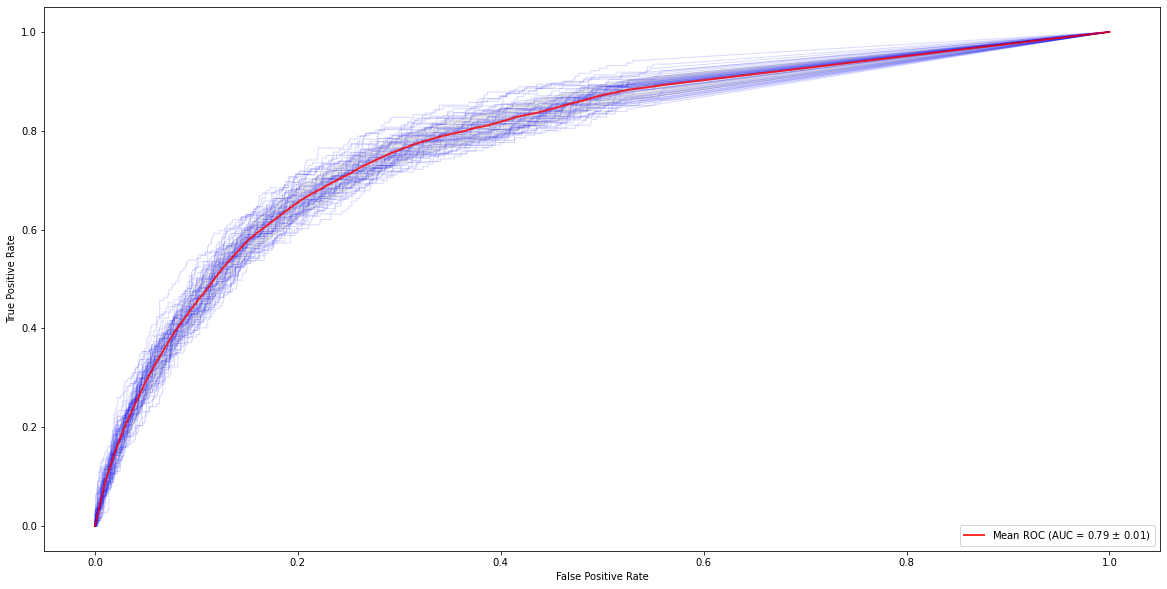

In [14]:
#- create plot instance
fig, (ax1) = plt.subplots(1, 1, figsize=(20,10))

#- go through all n model executions
for n in range(config.getint('settings', 'n_runs')):
    
    if config.getboolean('general', 'verbose'):
        print('run {} of {}'.format(n+1, config.getint('settings', 'n_runs')) + os.linesep)

    #- run machine learning model and return outputs
    X_df, y_df, eval_dict = pipeline.run(X, Y, config, scaler, clf, out_dir)
    
    #- select sub-dataset with only datapoints with observed conflicts
    X1_df, y1_df = utils.get_conflict_datapoints_only(X_df, y_df)
    
    #- append per model execution
    out_X_df = evaluation.fill_out_df(out_X_df, X_df)
    out_X1_df = evaluation.fill_out_df(out_X1_df, X1_df)
    out_y_df = evaluation.fill_out_df(out_y_df, y_df)
    out_y1_df = evaluation.fill_out_df(out_y1_df, y1_df)
    out_dict = evaluation.fill_out_dict(out_dict, eval_dict)

    #- plot ROC curve per model execution
    tprs, aucs = evaluation.plot_ROC_curve_n_times(ax1, clf, X_df.to_numpy(), y_df.y_test.to_list(),
                                                                  trps, aucs, mean_fpr)

#- plot mean ROC curve
evaluation.plot_ROC_curve_n_mean(ax1, tprs, aucs, mean_fpr)

## Model evaluation

### For all data points

During the model runs, the computed model evaluation scores per model execution were stored to a dictionary. Currently, the evaluation scores used are:

* [**Accuracy**](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html): the fraction of correct predictions;
* [**Precision**](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html): the ratio *tp / (tp + fp)* where tp is the number of true positives and fp the number of false positives. The precision is intuitively the ability of the classifier not to label as positive a sample that is negative;
* [**Recall**](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html): the ratio *tp / (tp + fn)* where tp is the number of true positives and fn the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples;
* [**F1 score**](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html): the F1 score can be interpreted as a weighted average of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0;
* [**Cohen-Kappa score**](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.cohen_kappa_score.html): is used to measure inter-rater reliability. It is generally thought to be a more robust measure than simple percent agreement calculation, as κ takes into account the possibility of the agreement occurring by chance.
* [**Brier score**](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.brier_score_loss.html): the smaller the Brier score, the better, hence the naming with “loss”. The lower the Brier score is for a set of predictions, the better the predictions are calibrated. Note that the Brier loss score is relatively sensitive for imbalanced datasets;
* [**ROC score**](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html): a value of 0.5 suggests no skill, e.g. a curve along the diagonal, whereas a value of 1.0 suggests perfect skill, all points along the left y-axis and top x-axis toward the top left corner. A value of 0.0 suggests perfectly incorrect predictions. Note that the ROC score is relatively insensitive for imbalanced datasets.

Let's check the mean scores over all runs:

In [15]:
for key in out_dict:
    
    print('average {0} of run with {1} repetitions is {2:0.3f}'.format(key, config.getint('settings', 'n_runs'), np.mean(out_dict[key])))

average Accuracy of run with 50 repetitions is 0.849
average Precision of run with 50 repetitions is 0.522
average Recall of run with 50 repetitions is 0.289
average F1 score of run with 50 repetitions is 0.371
average Cohen-Kappa score of run with 50 repetitions is 0.293
average Brier loss score of run with 50 repetitions is 0.111
average ROC AUC score of run with 50 repetitions is 0.788


Based on all data points, the [**confusion matrix**](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) can be plotted. This is a relatively straightforward way to visualize how good the classifier values are predicted by the model.

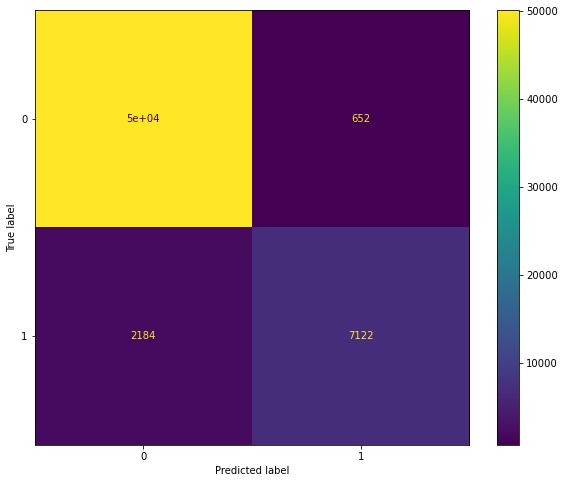

In [16]:
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
metrics.plot_confusion_matrix(clf, out_X_df.to_numpy(), out_y_df.y_test.to_list(), ax=ax);

### Per unique polygon

Thus far, we merely looked at numerical scores. This of course tells us a lot about the quality of the machine-learning model and its predictions, but not so much about how this looks like spatially. We therefore combine the observations and predictions made with the associated polygons based on a 'global' dataframe functioning as a look-up table. By this means, each model output can be connected to its polygon using a unique ID.

In [17]:
df_hit, gdf_hit = evaluation.polygon_model_accuracy(out_y_df, global_df)

First, let's have a look at how often each polygon occurs in the all test samples, i.e. those obtained by appending the test samples per model execution. Besides, the overall relative distribution is visualized.

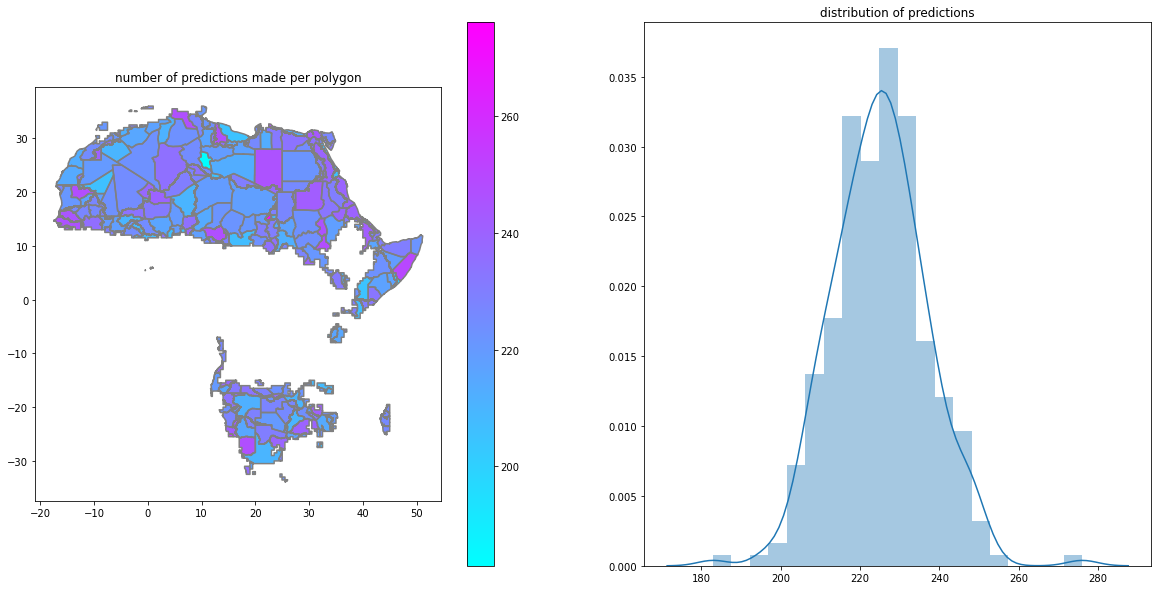

In [18]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))
gdf_hit.plot(ax=ax1, column='ID_count', legend=True, cmap='cool')
selected_polygons_gdf.boundary.plot(ax=ax1, color='0.5')
ax1.set_title('number of predictions made per polygon')
sbs.distplot(df_hit.ID_count.values, ax=ax2)
ax2.set_title('distribution of predictions');

By repeating the model n times, the aim is to represent all polygons in the resulting test sample. The fraction is computed below. 

Note that is should be close to 100 % but may be slightly less. This can happen if input variables have no data for one polygon, leading to a removal of those polygons from the analysis. Or because some polygons and input data may not overlap.

In [19]:
print('{0:0.2f} % of all active polygons are considered in test sample'.format(len(gdf_hit)/len(selected_polygons_gdf)*100))

97.45 % of all active polygons are considered in test sample


By aggregating results per polygon, we can now assess model output spatially. Three main aspects are presented here:

1. The chance of a correct prediction, defined as the ratio of number of correct predictions made to overall number of predictions made;
2. The total number of conflicts in the test data;
3. The chance of conflict, defined as the ration of number of conflict predictions to overall number of predictions made.

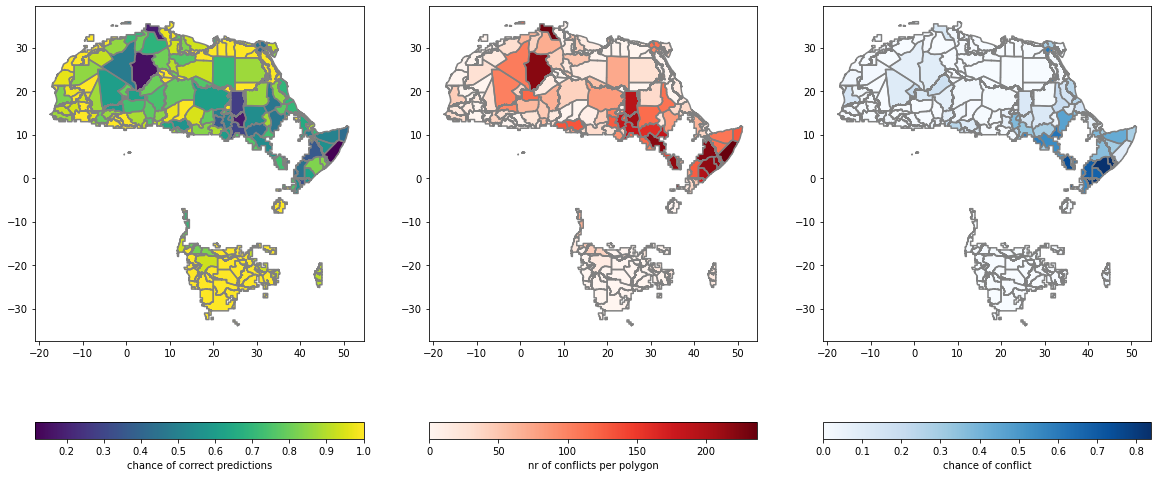

In [20]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 10))
gdf_hit.plot(ax=ax1, column='chance_correct_pred', legend=True, 
             legend_kwds={'label': "chance of correct predictions", 'orientation': "horizontal"})
selected_polygons_gdf.boundary.plot(ax=ax1, color='0.5')
gdf_hit.plot(ax=ax2, column='nr_test_confl', legend=True, cmap='Reds', 
             legend_kwds={'label': "nr of conflicts per polygon", 'orientation': "horizontal"})
selected_polygons_gdf.boundary.plot(ax=ax2, color='0.5')
gdf_hit.plot(ax=ax3, column='chance_correct_confl_pred', legend=True, cmap='Blues', 
             legend_kwds={'label': "chance of conflict", 'orientation': "horizontal"})
selected_polygons_gdf.boundary.plot(ax=ax3, color='0.5');

To understand to what extent the model accuracy (i.e. hits) may depend on the number of predictions made per polygon or other factors, we plot some simple scatter plots.

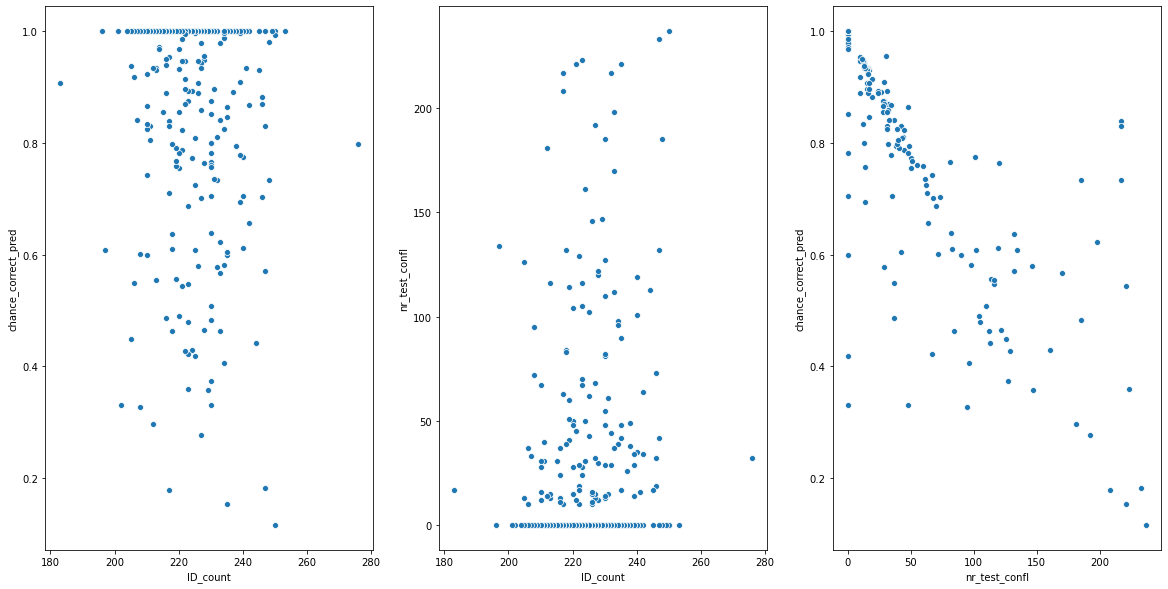

In [21]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 10))
sbs.scatterplot(data=df_hit, x='ID_count', y='chance_correct_pred', ax=ax1)
sbs.scatterplot(data=df_hit, x='ID_count', y='nr_test_confl', ax=ax2)
sbs.scatterplot(data=df_hit, x='nr_test_confl', y='chance_correct_pred', ax=ax3)

Up to know, we looked at two or more indicators of how the model performed and other statistical analyses per polygon. It's now time to come up with an indicator for which polygons we 'trust' the model.

Thus, we compute the median of the average hit accuracy of all polygons. This allows for dividing the polygons in the 50 % with an average hit accuracy above the median, and the other 50 % below it. These are our main categories:

* 'H': upper 50 % of average hit accuracy;
* 'L': lower 50 % of average hit accuracy.

In addition, we may want to know how this categorization depends on the number of conflicts in a polygon. For example, wich polygons have a high accuracy with lots of conflicts? For these polygons, we could assume that the model robustly succeeds in predicting conflict. To that end, we also compute the median number of conflicts per polygon.

This yields four sub-categories:

* 'HH': upper 50 % of average hit accuracy and upper 50 % of number of conflicts;
* 'HL': upper 50 % of average hit accuracy, but then with lower 50 % of number of conflicts;
* 'LH': lower 50 % of average hit accuracy and upper 50 % of number of conflicts;
* 'LL': lower 50 % of average hit accuracy, but then with lower 50 % of number of conflicts.

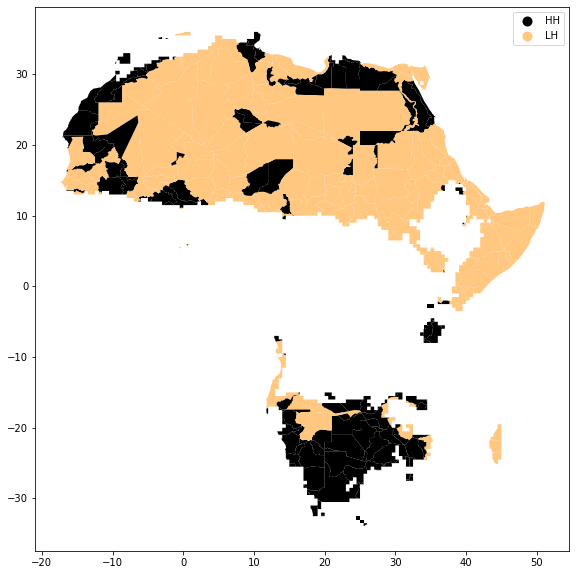

In [22]:
plots.plot_categories(gdf_hit, out_dir, category='sub')